# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import crispr as cr
from crispr import Omics
from anndata import AnnData
import scanpy as sc
import copy

resolution = 1.2
col_sample_id = "orig.ident"
kws_harmony = {"plot_convergence": True, "random_state": 1618}
col_guide_rna = "feature_call"
col_num_umis = "num_umis"
guide_split = "-"
key_control_patterns = ["CTRL"]
key_control, key_treatment = "NT", "KD"
col_guide_rna_new = "target_gene_name"

kws_process_guide_rna = dict(feature_split="|", guide_split="-",
                             key_control_patterns=["CTRL"],
                             remove_multi_transfected=True,
                             min_n_target_control_drop=None,
                             max_pct_control_drop=75, min_n=None,
                             min_pct_dominant=80, min_pct_avg_n=40)
kws_init = {"assay": None, "assay_protein": None,
            "col_gene_symbols": "gene_symbols",
            "col_cell_type": "majority_voting",
            "col_sample_id": col_sample_id,
            "key_control": key_control, "key_treatment": key_treatment,
            "col_condition": col_guide_rna_new}  # initialization arguments
kws_crispr = {
    "kws_process_guide_rna": kws_process_guide_rna,
    "col_guide_rna": "feature_call", "col_num_umis": "num_umis",
    "col_perturbed": "perturbation"}  # CRISPR initialization arguments
kws_umap = {"min_dist": 0.3}
kws_pp = {"kws_hvg": {"min_mean": 0.0125, "max_mean": 10, "min_disp": 0.5},
          "target_sum": 1e4, "cell_filter_pmt": [0, 15], "kws_scale": "z",
          "regress_out": None, "kws_umap": kws_umap,
          "cell_filter_ngene": [200, 7000],
          "cell_filter_ncounts": [500, 60000], "gene_filter_ncell": [3, None],
          }
kws_cluster = {"method_cluster": "leiden", "resolution": resolution,
               "kws_neighbors": None, "kws_umap": kws_umap, "kws_cluster": {},
               "kws_pca": {"n_comps": 20, "use_highly_variable": True}}
file_path = {"HH03": {"directory": "data/crispr-screening/HH03"},
             "HH04": {"directory": "data/crispr-screening/HH04"},
             "HH05": {"directory": "data/crispr-screening/HH05"},
             "HH06": {"directory": "data/crispr-screening/HH06"}}
            #  "CR4": {"directory": "data/crispr-screening/HH-Hu-CR4"},
            #  "CR5": {"directory": "data/crispr-screening/HH-Hu-CR5"}

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

# Create Integrated Object

We first have to create preprocessed and clustered individual objects, then integrate them with Harmony.

## Integrate Data

If `kws_pp` and/or `kws_cluster` = None, then preprocessing and/or clustering, respectively, will not be performed on individual objects.

## Create Overall Object



<<< INITIALIZING OMICS CLASS OBJECT >>>

Unused keyword arguments: {'assay_gdo': None}.

col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id="orig.ident"
col_batch="orig.ident"
col_subject=None
col_condition="target_gene_name"
col_num_umis="num_umis"
key_control="NT"
key_treatment="KD"


<<< INITIALIZING OMICS CLASS OBJECT >>>

Unused keyword arguments: {'assay_gdo': None}.

col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id="orig.ident"
col_batch="orig.ident"
col_subject=None
col_condition="target_gene_name"
col_num_umis="num_umis"
key_control="NT"
key_treatment="KD"


<<< LOADING PROTOSPACER METADATA >>>


Cell Counts: Initial


Observations: 15078



Gene Counts: Initial

Empty DataFrame
Columns: [index, gene_ids, feature_types]
Index: []





<<< PERFORMING gRNA PROCESSING & FILTERING >>>

{'feature_split': '|', 'guide_split': '-', 'key_control_patterns': ['CTRL'], 'min_n_target_control_drop': None, 'max_pct_control_drop': 75, 'min_pct_dominant'

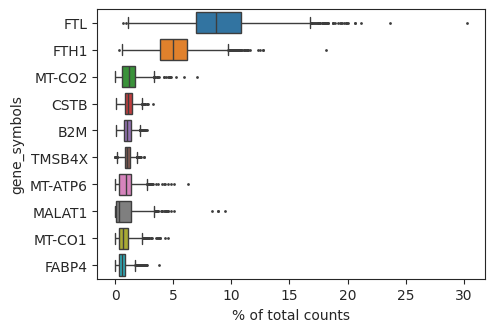



Cell Counts: Initial


Observations: 3635



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_call_original' as categorical
... storing 'num_umis_original' as categorical
... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'target_gene_name' as categorical
... storing 'guide_split' as categorical
... storing 'feature_types' as categorical


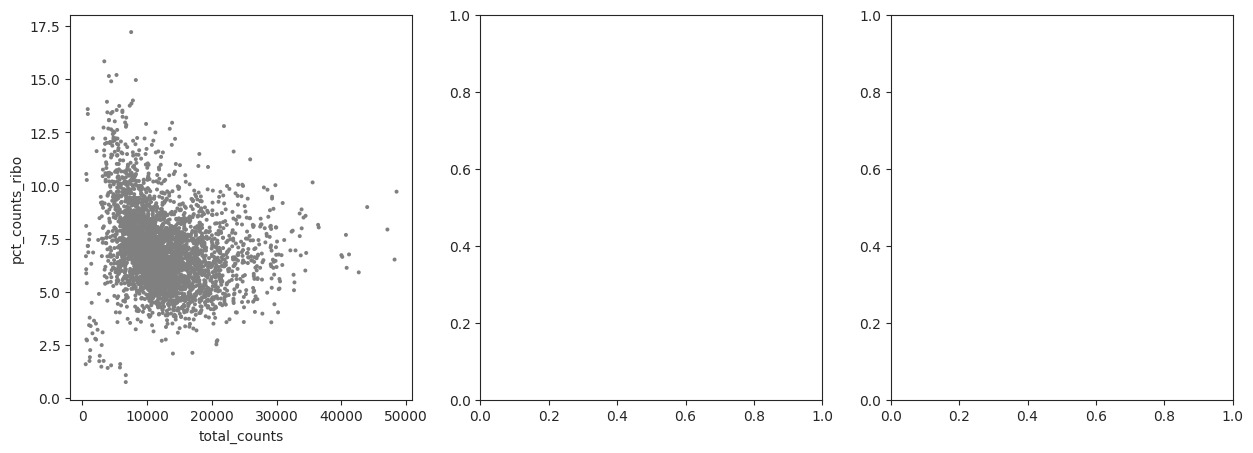


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>


Cell Counts: Post-Basic Filter


Observations: 3635



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%                0.0     0.000000           0.000000              91.994498   
50%                6.0     0.001651           0.001649              99.834938   
75%              291.0     0.088308           0.084624             100.000000   

     total_counts  log1p_total_counts  
25%           0.0            0.000000  
50%           6.0            1.945910  
75%         321.0            5.774551  





Cell Counts: Post-Basic Filter


Observations: 3635



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%               19.0     0.005502           0.005487              73.947730   
50%              197.0     0.058872           0.057204              94.580468   
75%              947.0    

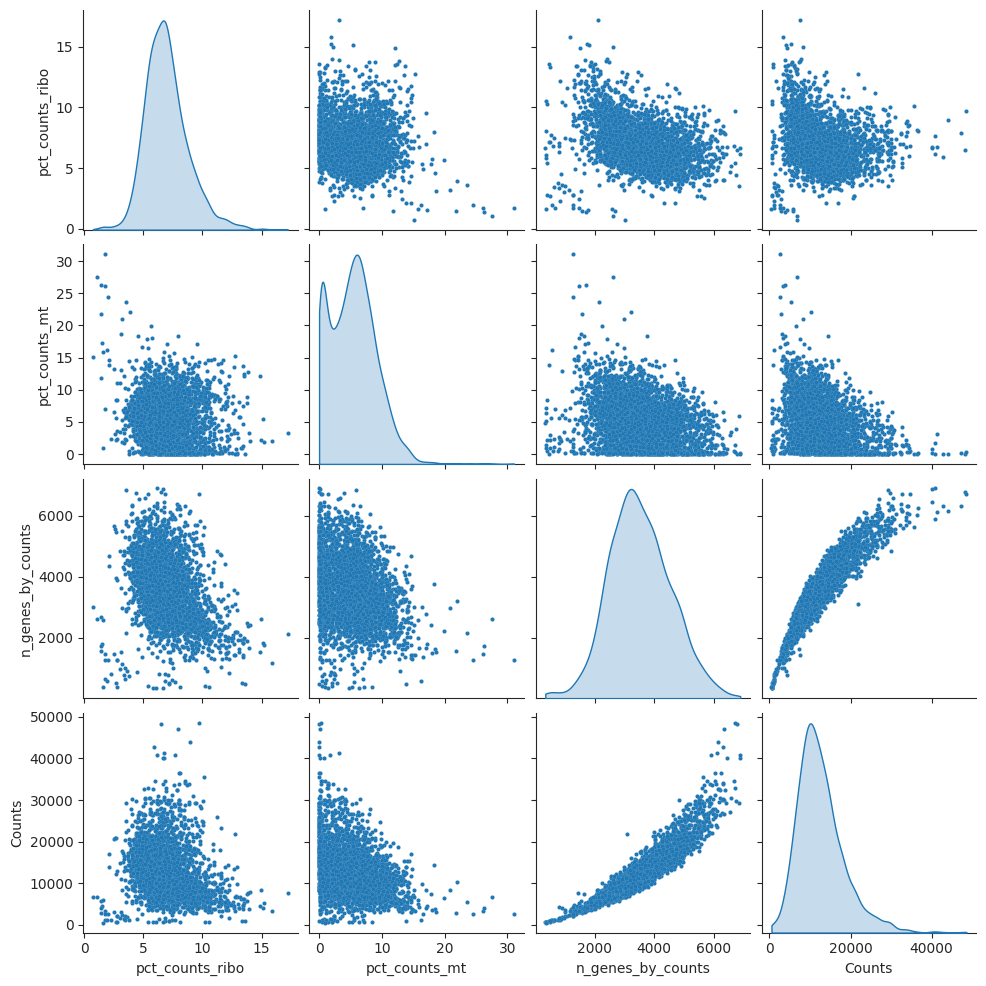

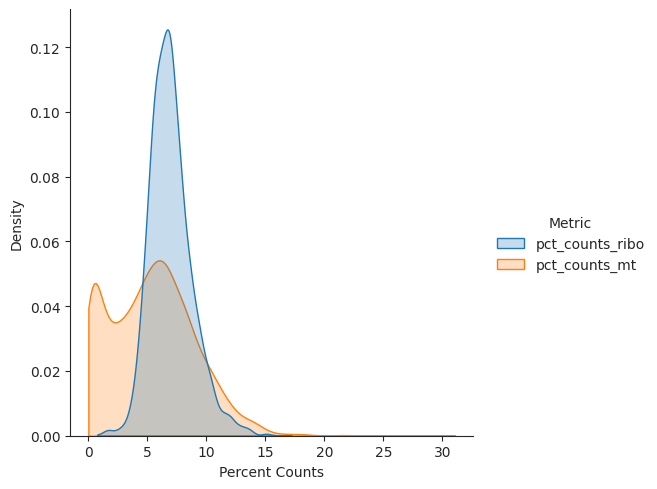

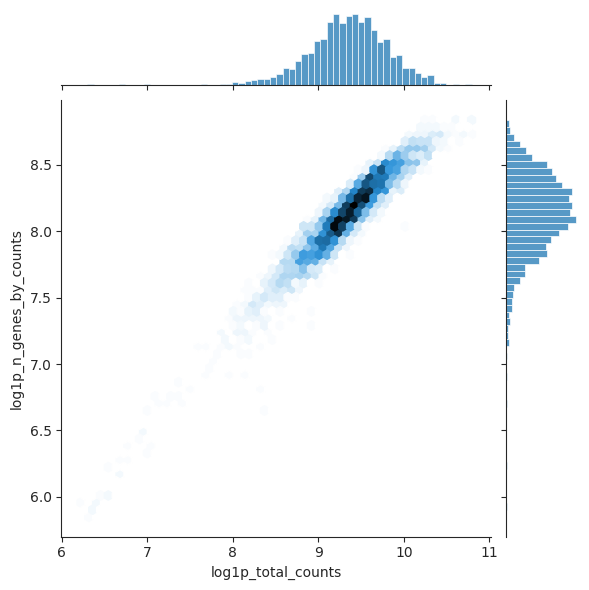

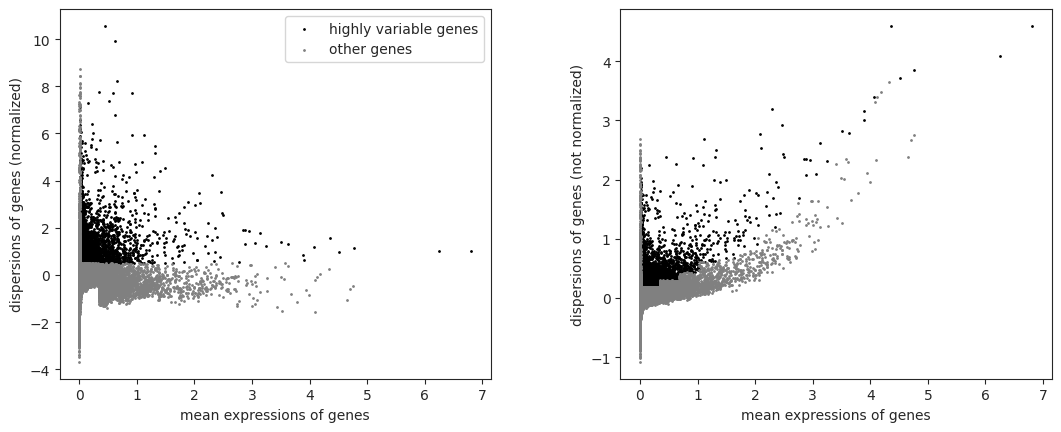


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Resetting to raw counts before scaling...

	*** Z-scoring (relative to NT)

Un-Used Keyword Arguments: {'col_batch': 'orig.ident'}



	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing


Observations: 3607



Gene Counts: Post-Processing

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%               19.0     0.005502           0.005487              73.892710   
50%              198.0     0.059147           0.057464              94.552957   
75%              949.0     0.333700           0.287957              99.477304   

     total_counts  log1p_total_counts  n_cells     means  dispersions  \
25%          20.0            3.044523     19.0  0.004265    -0.075894   
50%         215.0            5.375278    197.0  0.045395     0.036822   
75%        1213.0            7.101676    946.0  0.233840     0.188148   

     dispersions_norm  
25%         -0.510126  
50%         -0.132030  
75%  

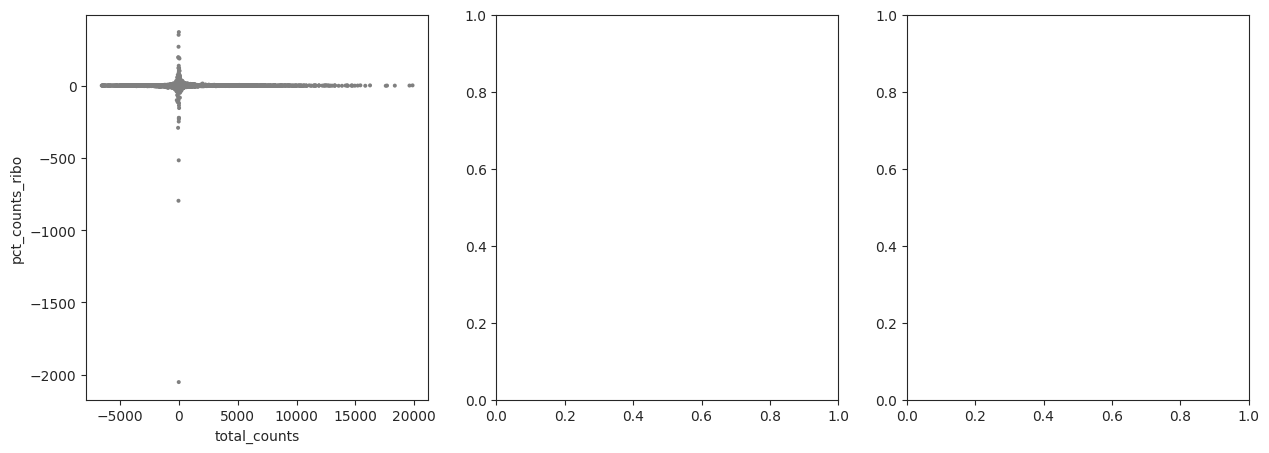

<class 'anndata._core.anndata.AnnData'>

<<< CLUSTERING HH03 >>>


Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': 'orig.ident', 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'key_treatment': 'KD'}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


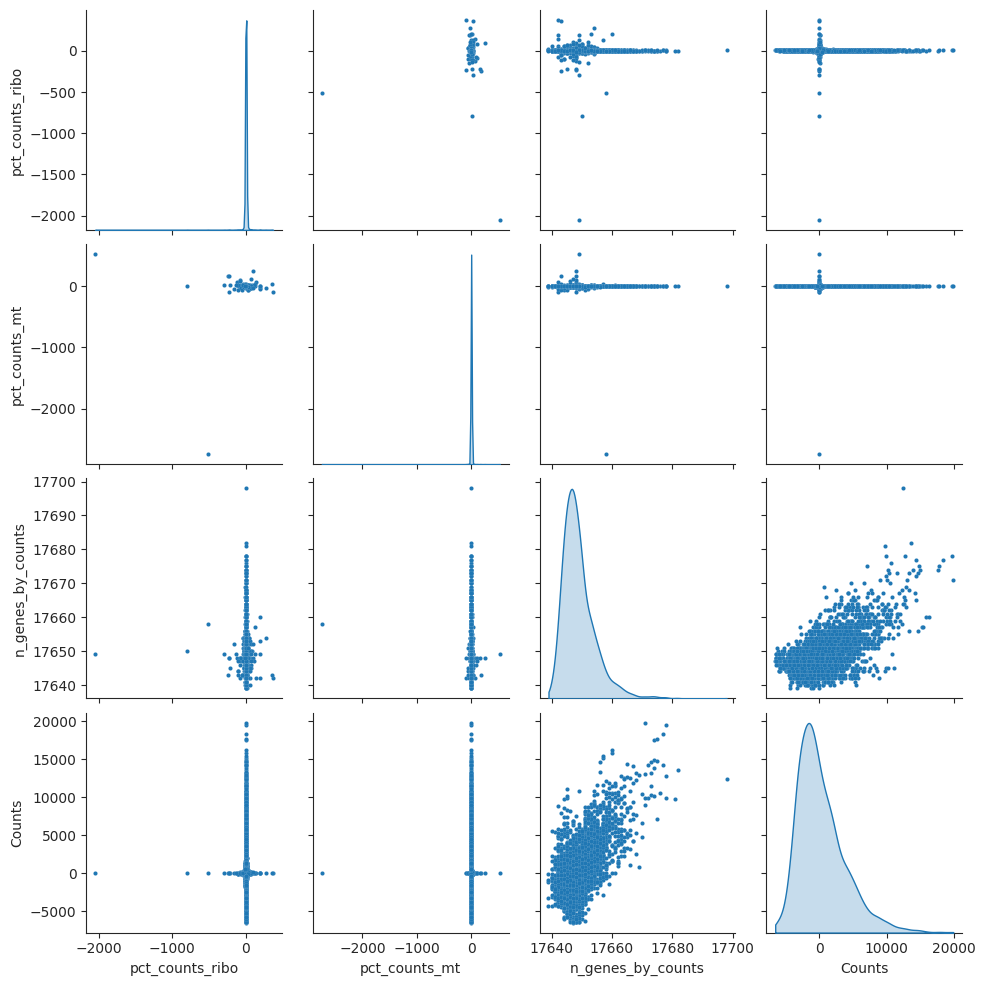

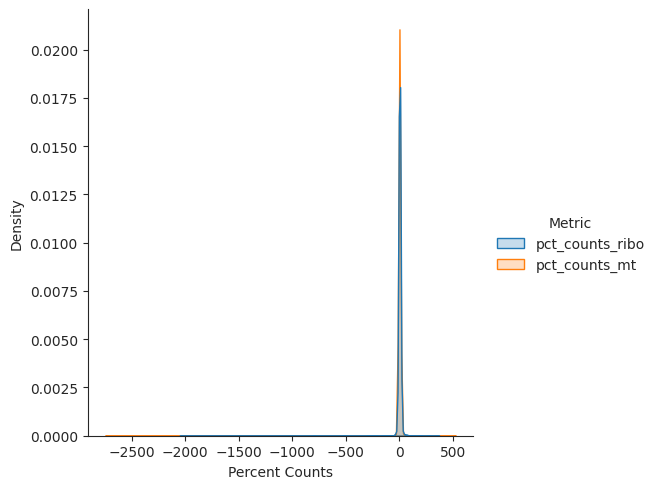

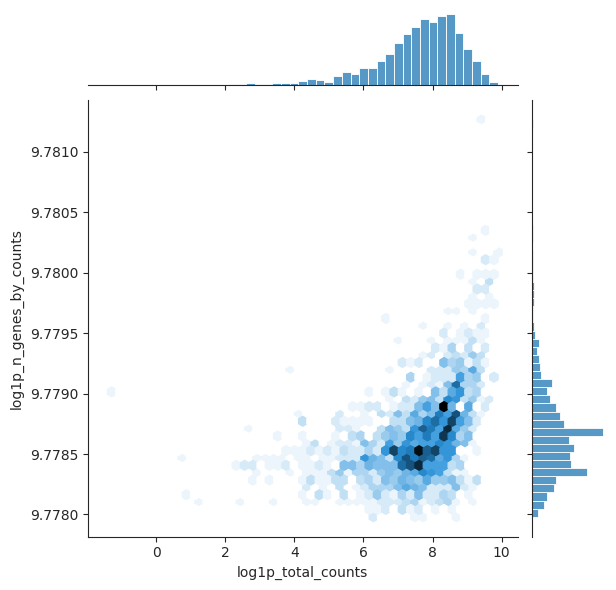

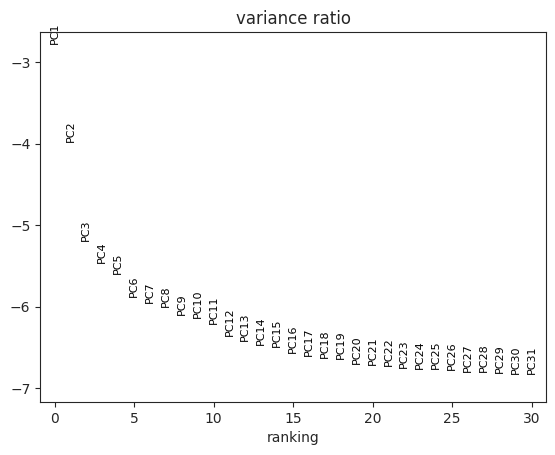

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'kws_hvg' as categorical
... storing 'target_sum' as categorical
... storing 'cell_filter_pmt' as categorical
... storing 'regress_out' as categorical
... storing 'kws_umap' as categorical
... storing 'cell_filter_ngene' as categorical
... storing 'cell_filter_ncounts' as categorical
... storing 'gene_filter_ncell' as categorical
... storing 'kws_scale' as categorical
... storing 'method_cluster' as categorical


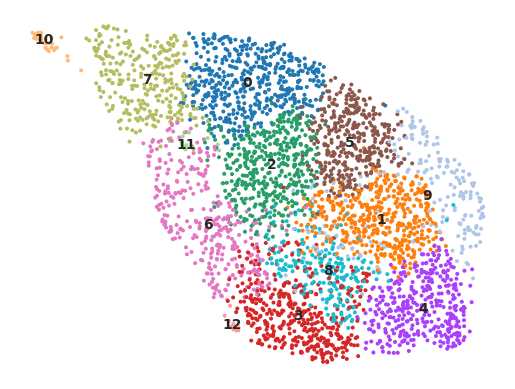


<<< PREPROCESSING HH04 >>>

Un-Used Keyword Arguments: {'assay_protein': None, 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'kws_umap': {'min_dist': 0.3}}




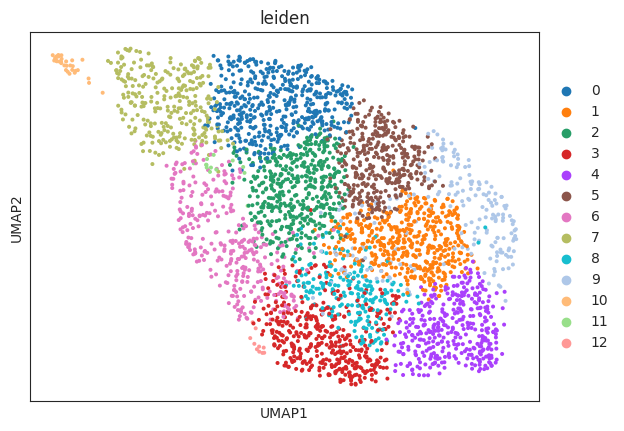

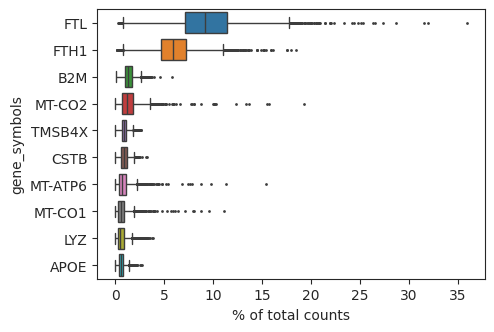



Cell Counts: Initial


Observations: 5613



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_call_original' as categorical
... storing 'num_umis_original' as categorical
... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'target_gene_name' as categorical
... storing 'guide_split' as categorical
... storing 'feature_types' as categorical


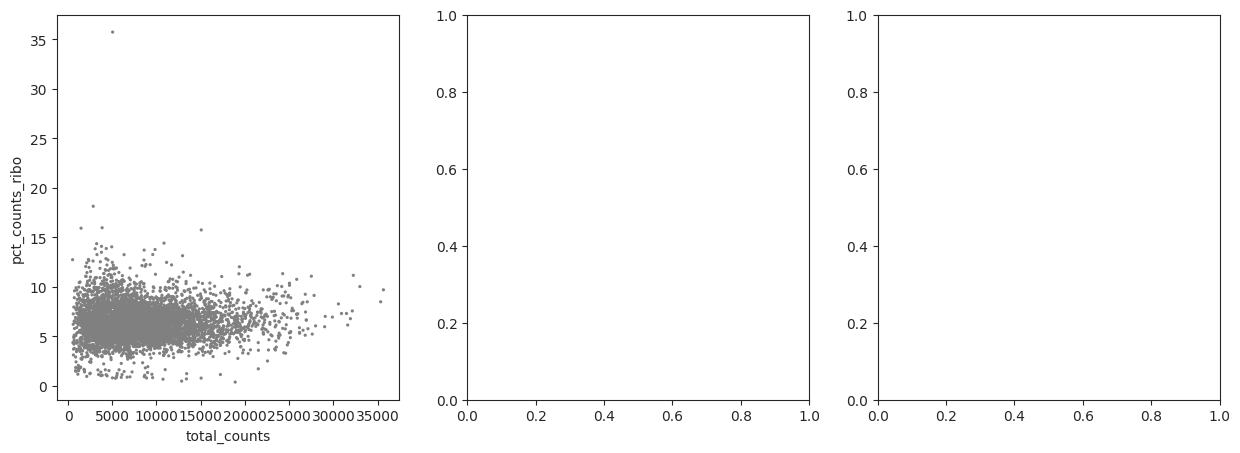


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>


Cell Counts: Post-Basic Filter


Observations: 5613



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%                0.0     0.000000           0.000000              94.851238   
50%                5.0     0.001069           0.001068              99.910921   
75%              289.0     0.055763           0.054264             100.000000   

     total_counts  log1p_total_counts  
25%           0.0            0.000000  
50%           6.0            1.945910  
75%         313.0            5.749393  





Cell Counts: Post-Basic Filter


Observations: 5613



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%               19.0     0.003563           0.003557              82.148584   
50%              196.0     0.037413           0.036730              96.508106   
75%             1002.0    

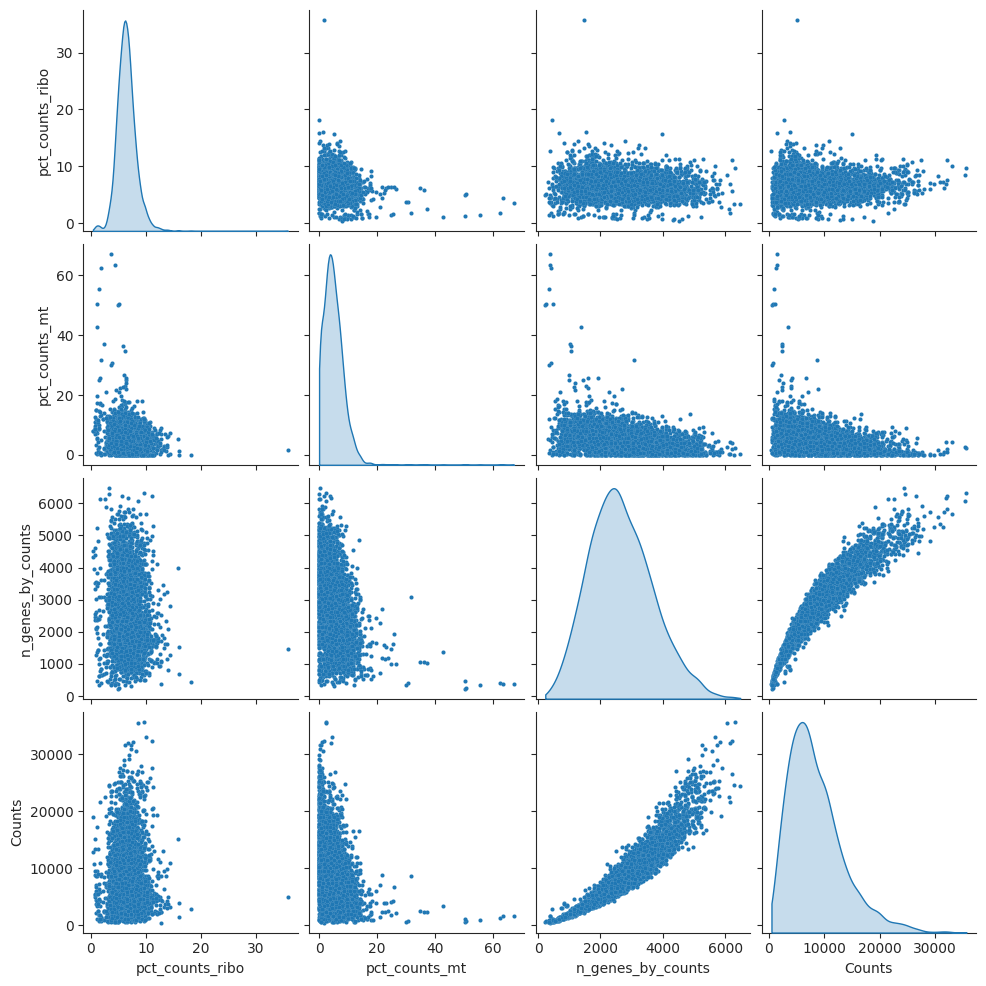

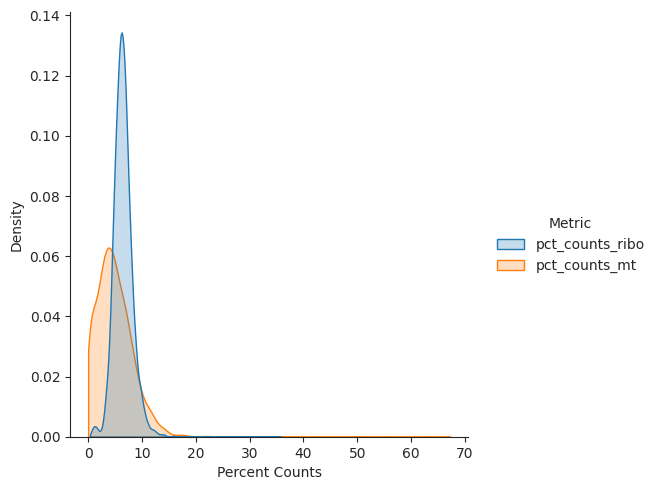

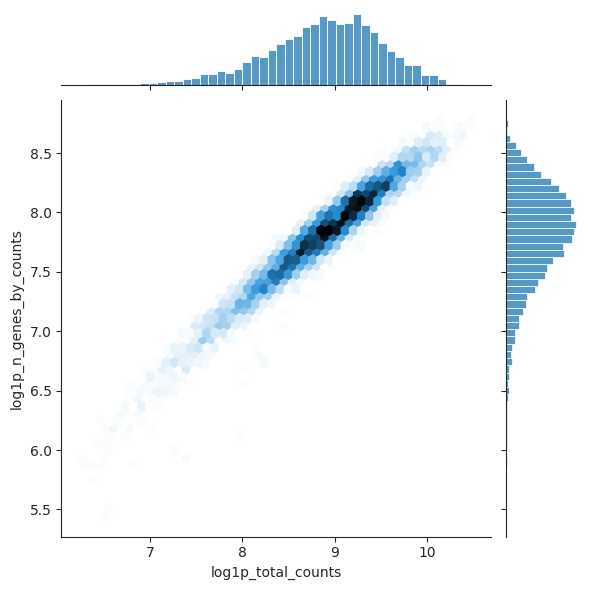

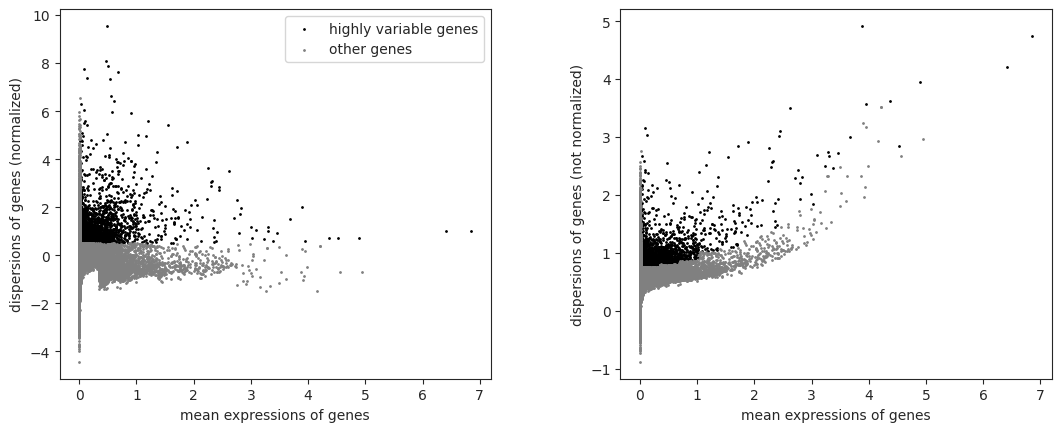


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Resetting to raw counts before scaling...

	*** Z-scoring (relative to NT)

Un-Used Keyword Arguments: {'col_batch': 'orig.ident'}



	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing


Observations: 5558



Gene Counts: Post-Processing

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%               19.0     0.003563           0.003557              82.130768   
50%              197.0     0.037591           0.036902              96.490290   
75%             1003.0     0.214725           0.194518              99.661500   

     total_counts  log1p_total_counts  n_cells     means  dispersions  \
25%         20.00            3.044523     19.0  0.004243     0.472568   
50%        211.00            5.356586    196.0  0.044316     0.607527   
75%       1205.25            7.095271    999.0  0.227949     0.754808   

     dispersions_norm  
25%         -0.523907  
50%         -0.053561  
75%  

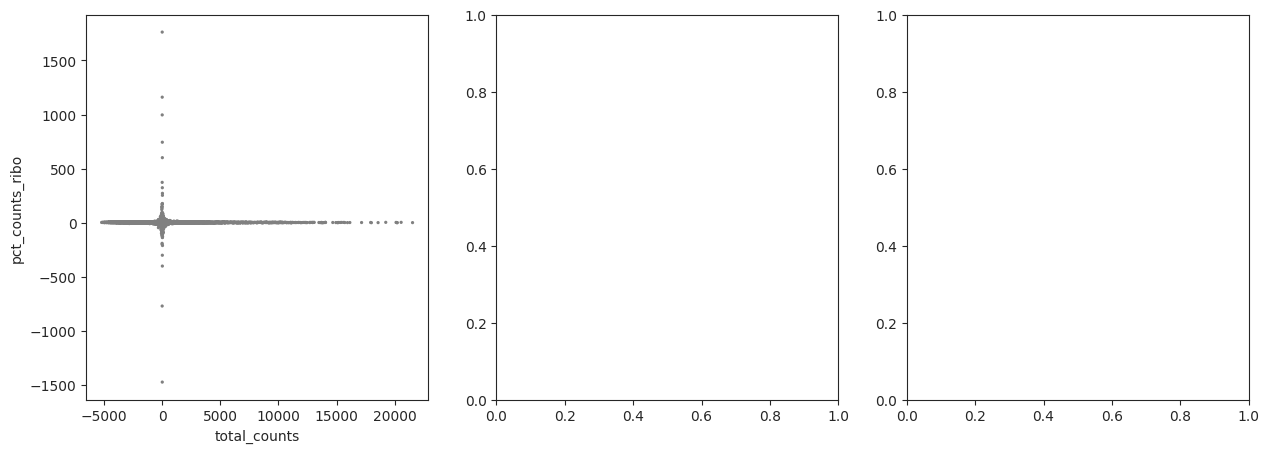

<class 'anndata._core.anndata.AnnData'>

<<< CLUSTERING HH04 >>>


Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': 'orig.ident', 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'key_treatment': 'KD'}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


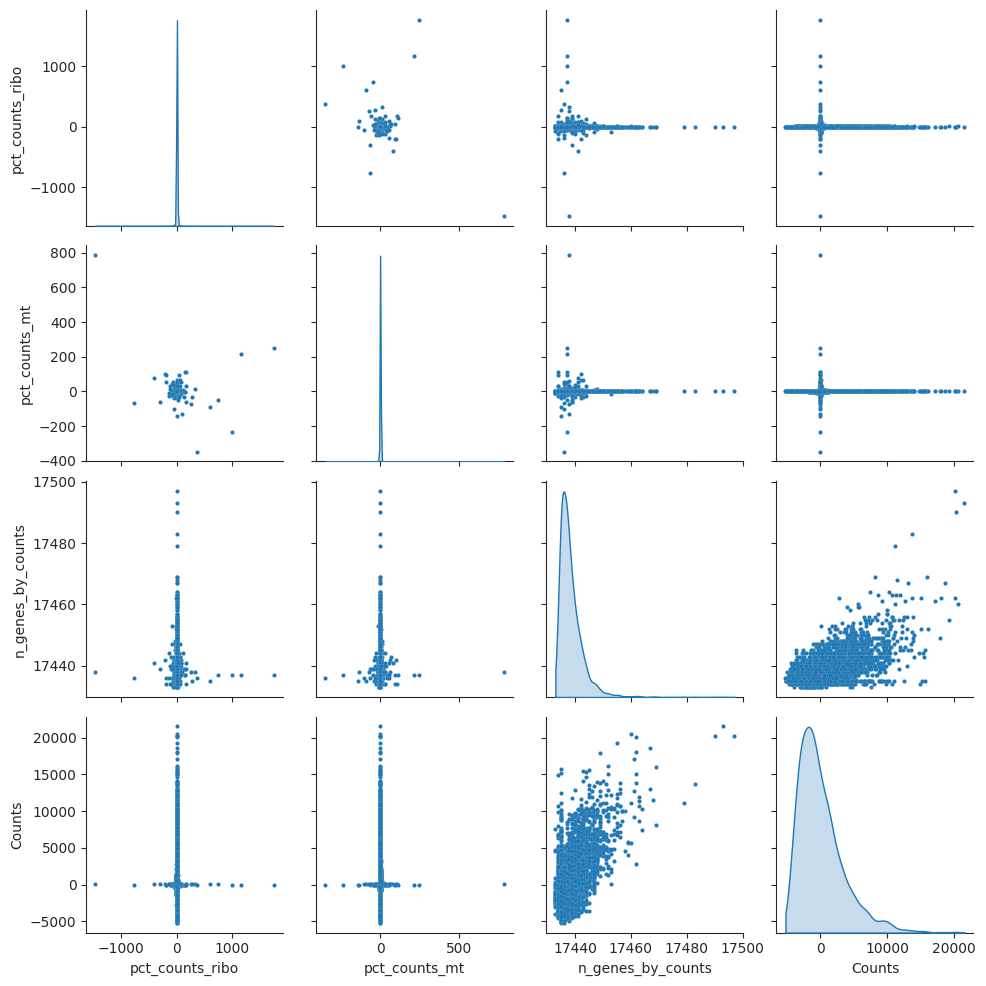

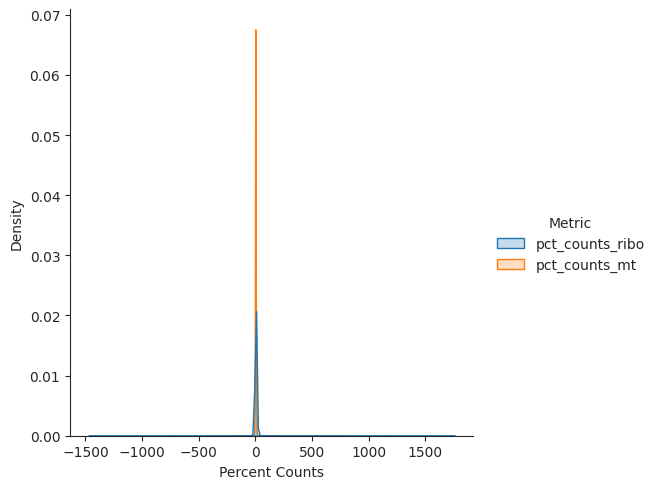

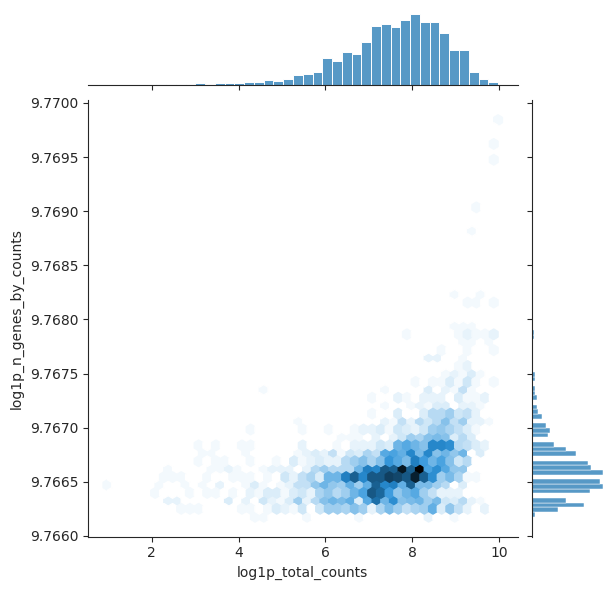

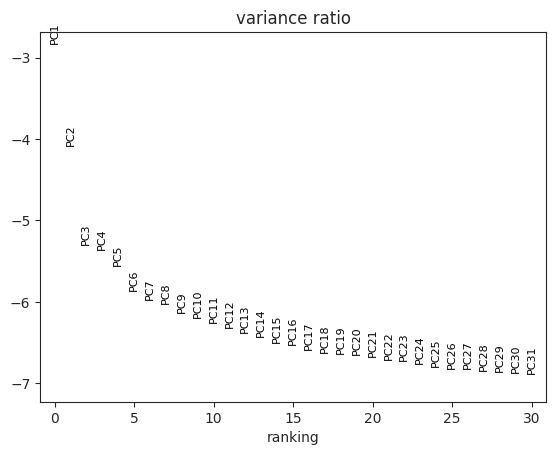

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'kws_hvg' as categorical
... storing 'target_sum' as categorical
... storing 'cell_filter_pmt' as categorical
... storing 'regress_out' as categorical
... storing 'kws_umap' as categorical
... storing 'cell_filter_ngene' as categorical
... storing 'cell_filter_ncounts' as categorical
... storing 'gene_filter_ncell' as categorical
... storing 'kws_scale' as categorical
... storing 'method_cluster' as categorical


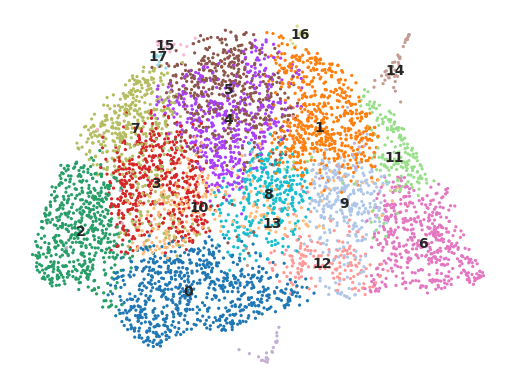


<<< PREPROCESSING HH05 >>>

Un-Used Keyword Arguments: {'assay_protein': None, 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'kws_umap': {'min_dist': 0.3}}




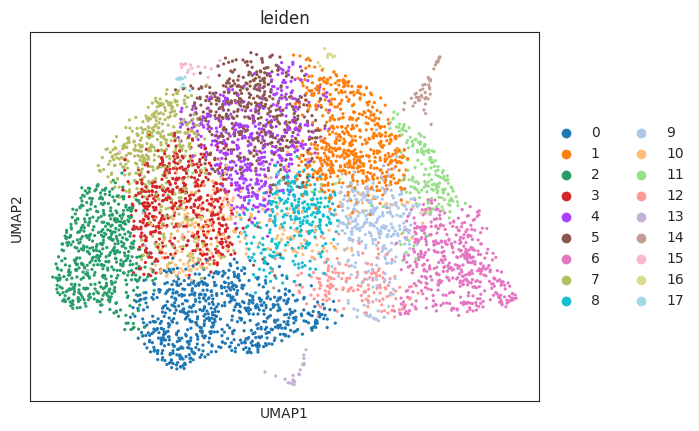

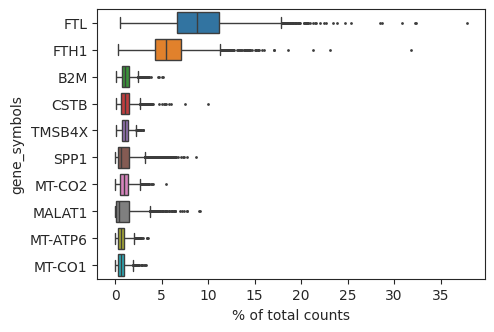



Cell Counts: Initial


Observations: 4408



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_call_original' as categorical
... storing 'num_umis_original' as categorical
... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'target_gene_name' as categorical
... storing 'guide_split' as categorical
... storing 'feature_types' as categorical


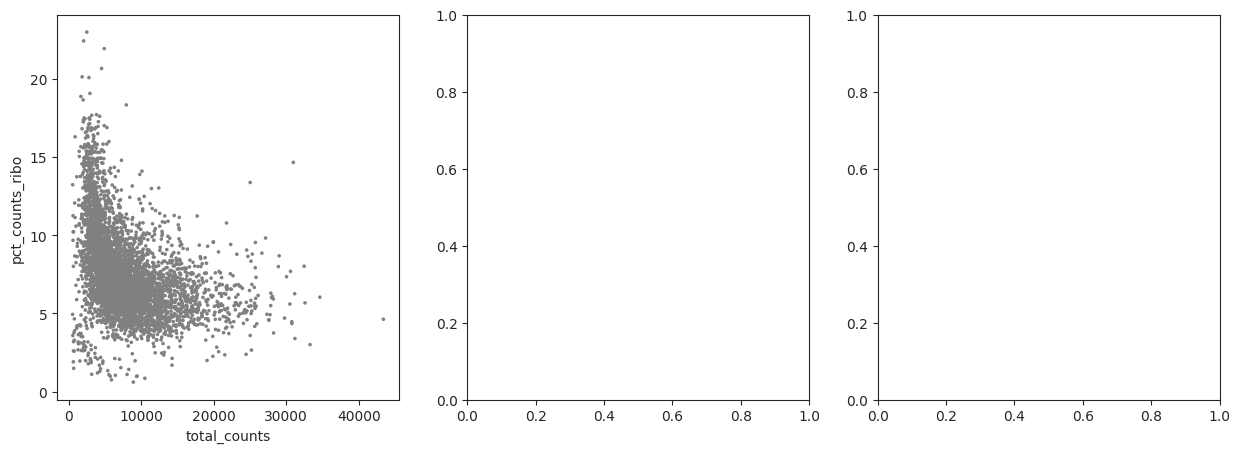


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>


Cell Counts: Post-Basic Filter


Observations: 4408



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%                0.0     0.000000           0.000000              94.759528   
50%                5.0     0.001134           0.001134              99.886570   
75%              231.0     0.056942           0.055380             100.000000   

     total_counts  log1p_total_counts  
25%           0.0            0.000000  
50%           5.0            1.791759  
75%         251.0            5.529429  





Cell Counts: Post-Basic Filter


Observations: 4408



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%               18.0     0.004310           0.004301              82.372958   
50%              167.0     0.040835           0.040023              96.211434   
75%              777.0    

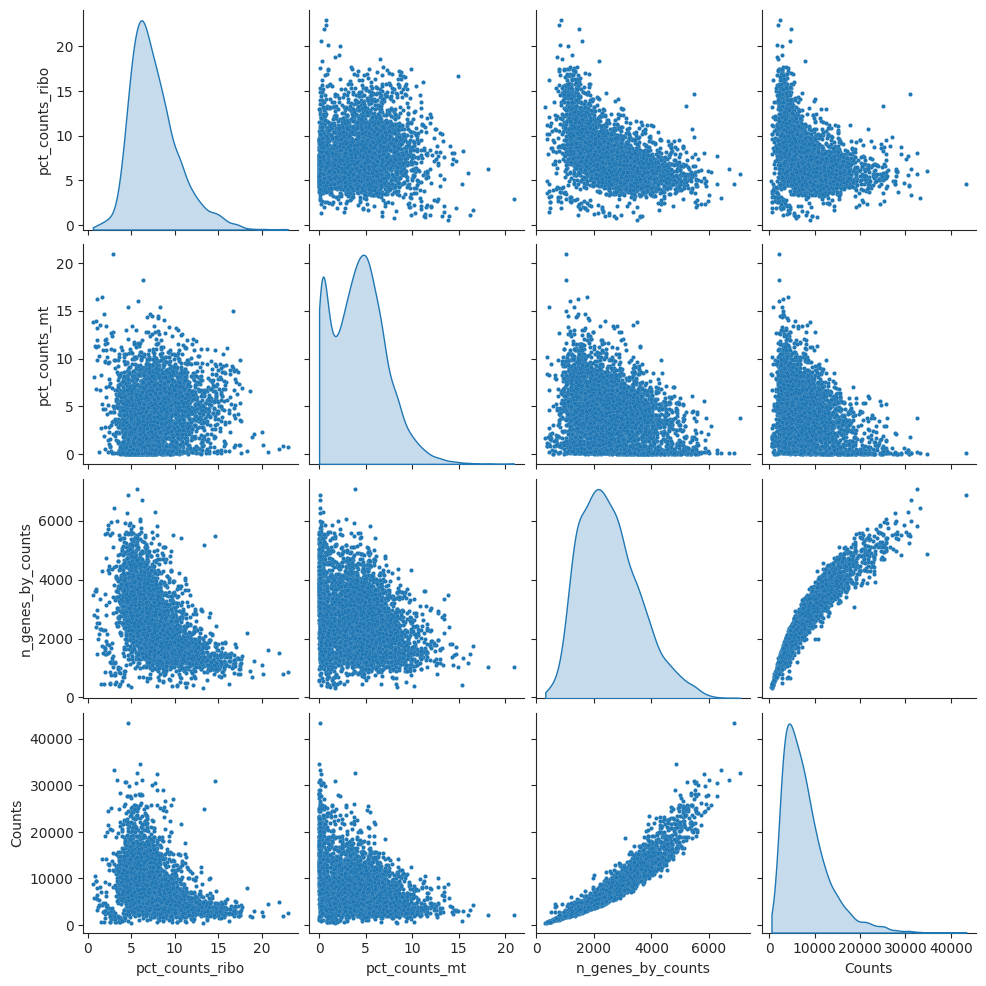

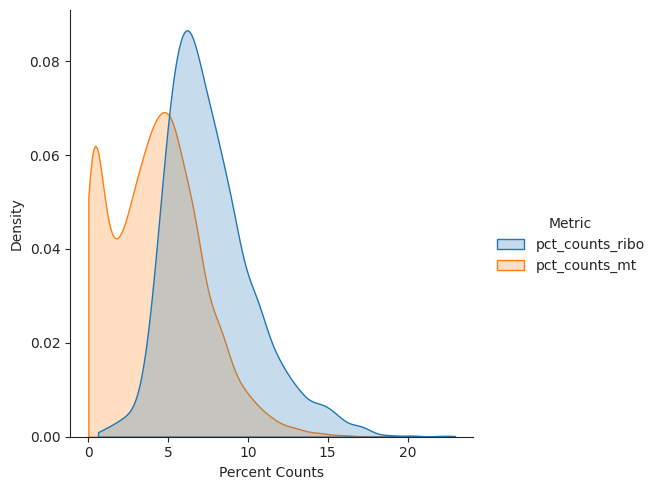

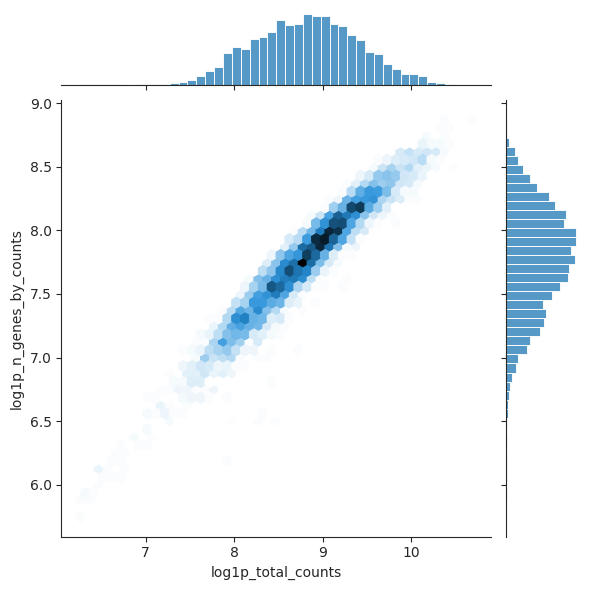

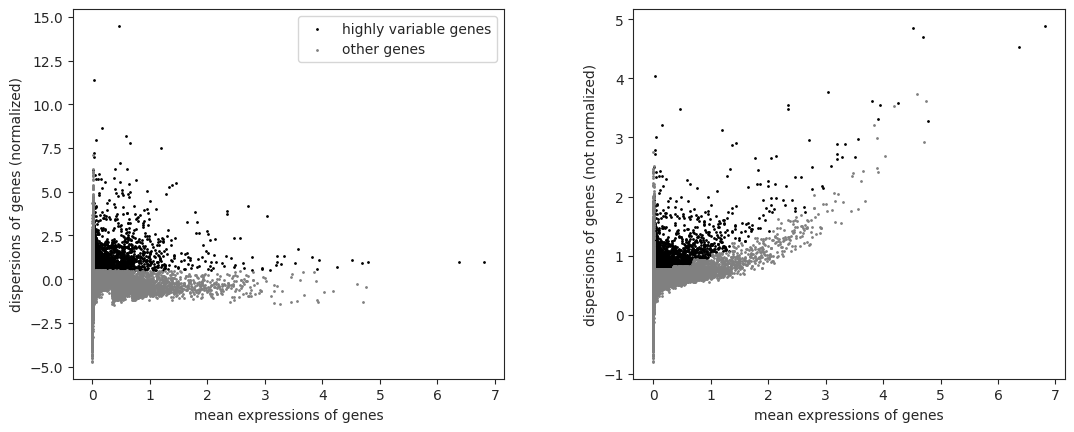


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Resetting to raw counts before scaling...

	*** Z-scoring (relative to NT)

Un-Used Keyword Arguments: {'col_batch': 'orig.ident'}



	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing


Observations: 4400



Gene Counts: Post-Processing

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%               18.0     0.004310           0.004301              82.350272   
50%              168.0     0.040835           0.040023              96.188748   
75%              778.0     0.212795           0.192928              99.591652   

     total_counts  log1p_total_counts  n_cells     means  dispersions  \
25%          19.0            2.995732     18.0  0.005569     0.535916   
50%         180.0            5.198497    167.0  0.051274     0.651758   
75%         938.0            6.844816    776.0  0.236577     0.783863   

     dispersions_norm  
25%         -0.459015  
50%         -0.031940  
75%  

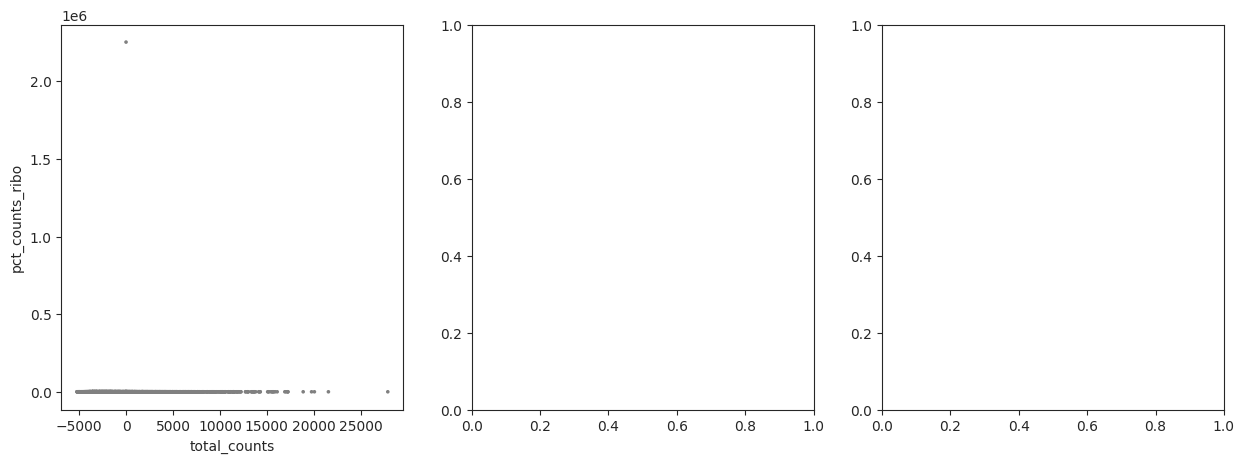

<class 'anndata._core.anndata.AnnData'>

<<< CLUSTERING HH05 >>>


Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': 'orig.ident', 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'key_treatment': 'KD'}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


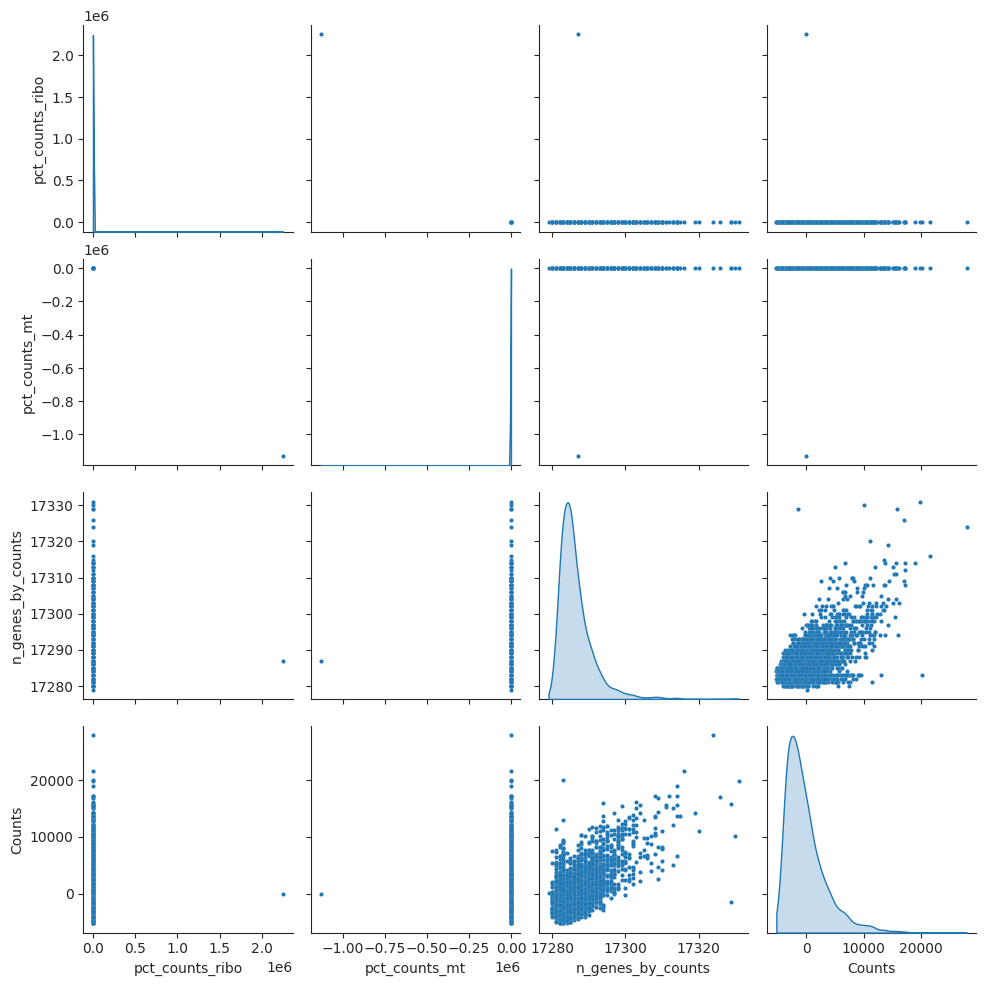

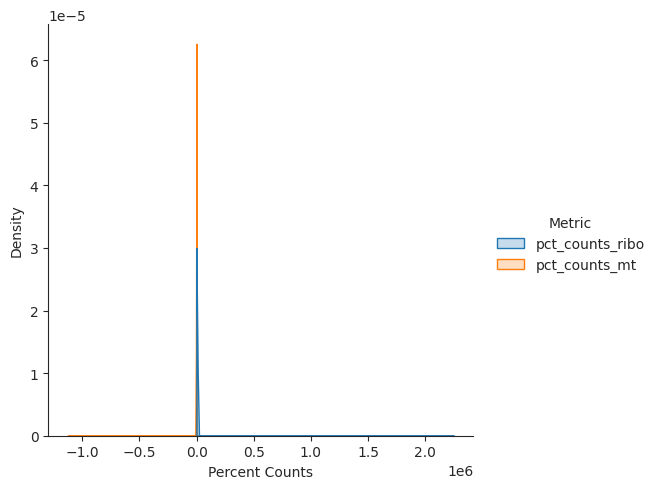

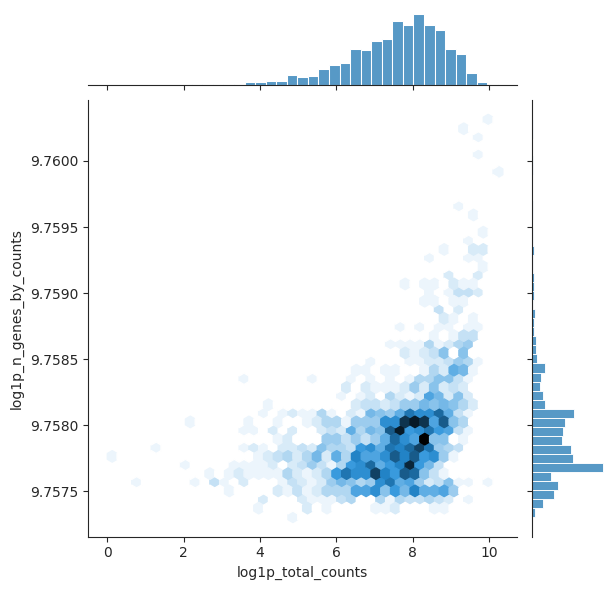

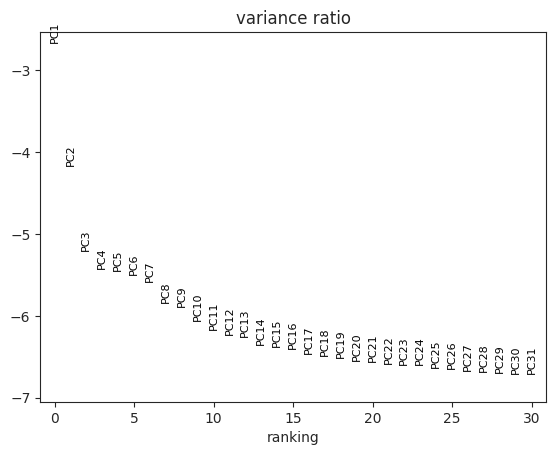

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'kws_hvg' as categorical
... storing 'target_sum' as categorical
... storing 'cell_filter_pmt' as categorical
... storing 'regress_out' as categorical
... storing 'kws_umap' as categorical
... storing 'cell_filter_ngene' as categorical
... storing 'cell_filter_ncounts' as categorical
... storing 'gene_filter_ncell' as categorical
... storing 'kws_scale' as categorical
... storing 'method_cluster' as categorical


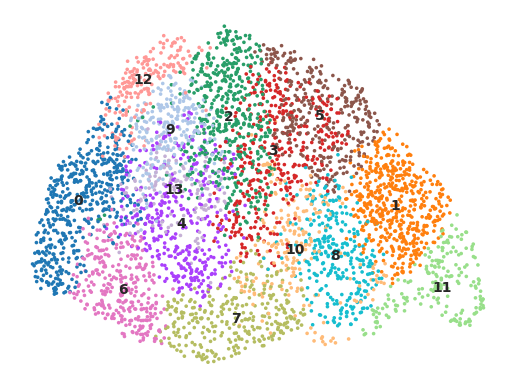


<<< PREPROCESSING HH06 >>>

Un-Used Keyword Arguments: {'assay_protein': None, 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'kws_umap': {'min_dist': 0.3}}




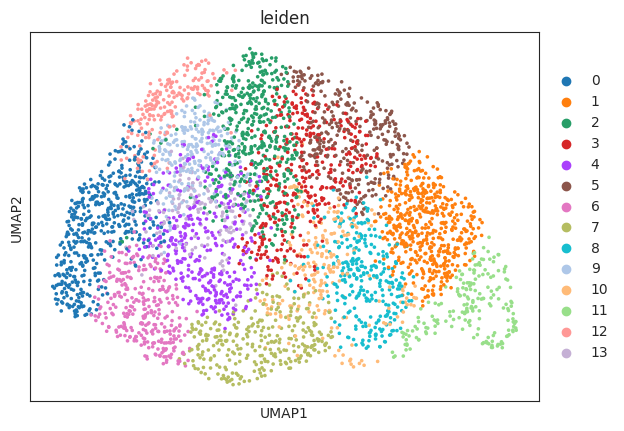

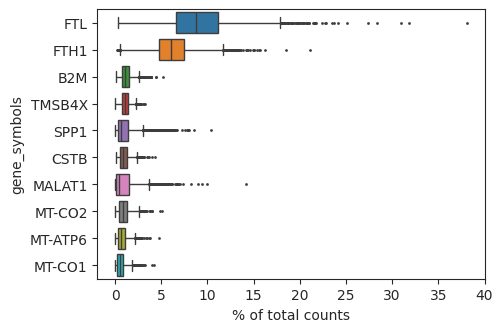



Cell Counts: Initial


Observations: 4120



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_call_original' as categorical
... storing 'num_umis_original' as categorical
... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'target_gene_name' as categorical
... storing 'guide_split' as categorical
... storing 'feature_types' as categorical


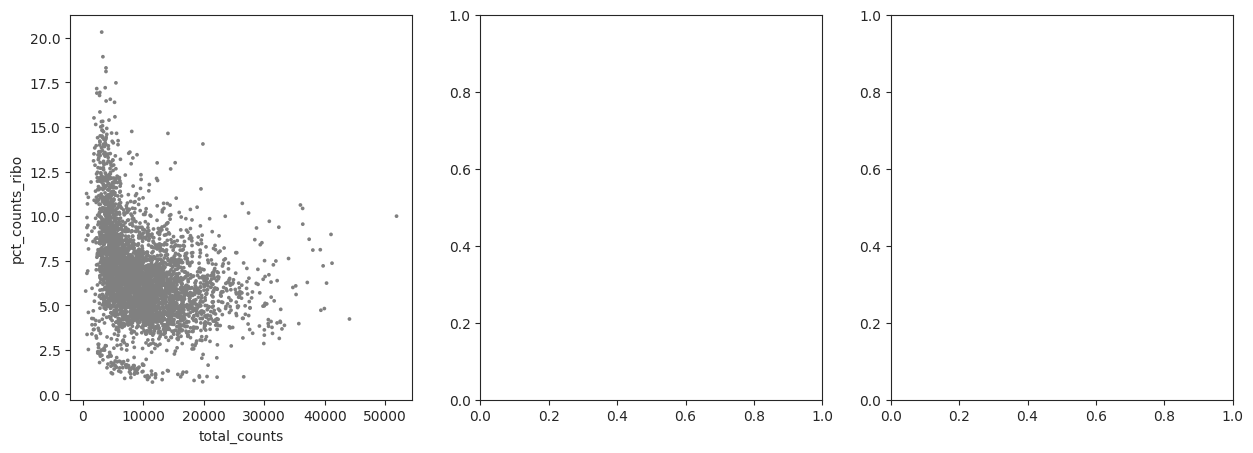


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>


Cell Counts: Post-Basic Filter


Observations: 4120



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%                0.0     0.000000           0.000000              93.179612   
50%                6.0     0.001456           0.001455              99.854369   
75%              281.0     0.075728           0.072998             100.000000   

     total_counts  log1p_total_counts  
25%           0.0            0.000000  
50%           6.0            1.945910  
75%         312.0            5.746203  





Cell Counts: Post-Basic Filter


Observations: 4120



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%               18.0     0.004612           0.004601              78.349515   
50%              184.0     0.049029           0.047865              95.533981   
75%              892.0    

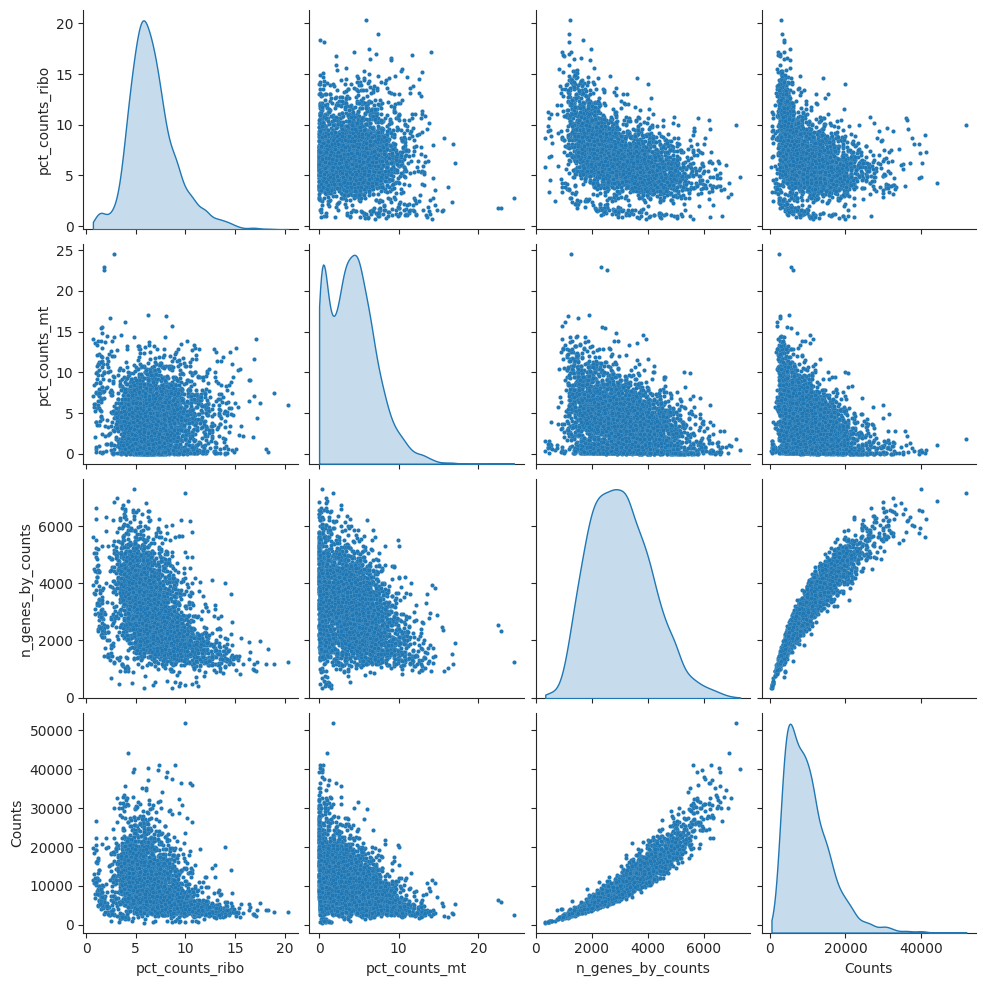

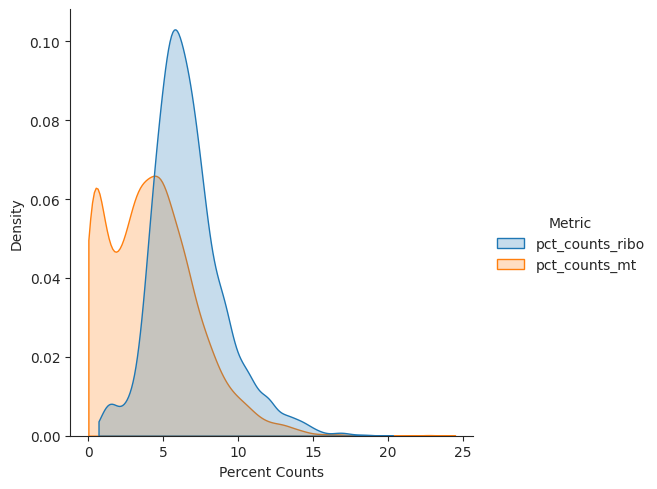

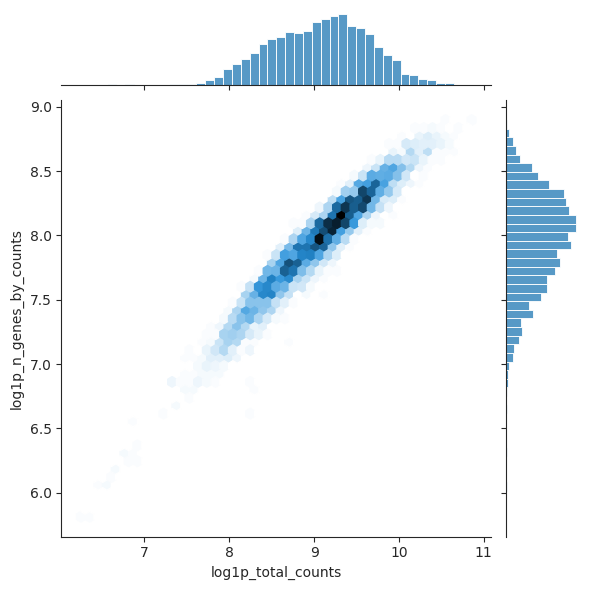

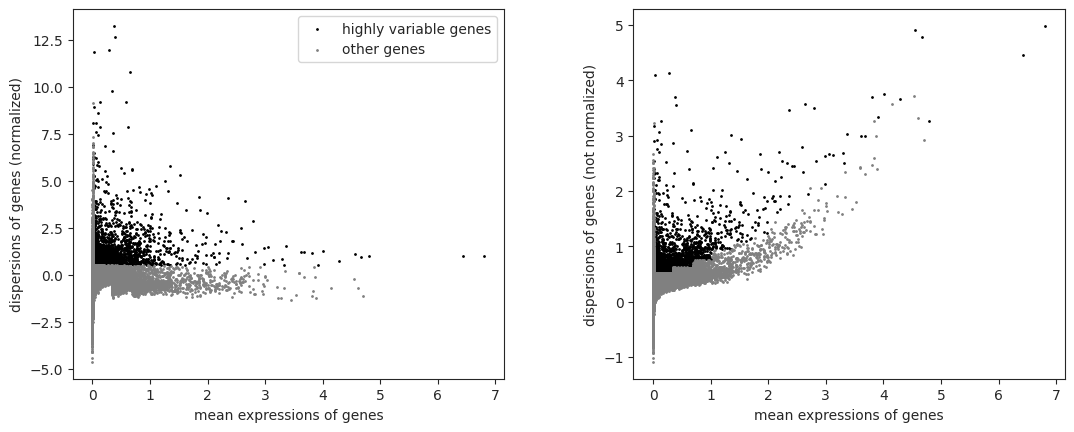


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Resetting to raw counts before scaling...

	*** Z-scoring (relative to NT)

Un-Used Keyword Arguments: {'col_batch': 'orig.ident'}



	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing


Observations: 4108



Gene Counts: Post-Processing

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%              18.00     0.004612           0.004601              78.319175   
50%             185.00     0.049272           0.048096              95.509709   
75%             893.25     0.274090           0.242232              99.563107   

     total_counts  log1p_total_counts  n_cells     means  dispersions  \
25%         19.00            2.995732     18.0  0.004745     0.278950   
50%        203.00            5.318120    184.0  0.048301     0.391993   
75%       1129.25            7.030194    891.0  0.239247     0.528935   

     dispersions_norm  
25%         -0.461757  
50%         -0.046923  
75%  

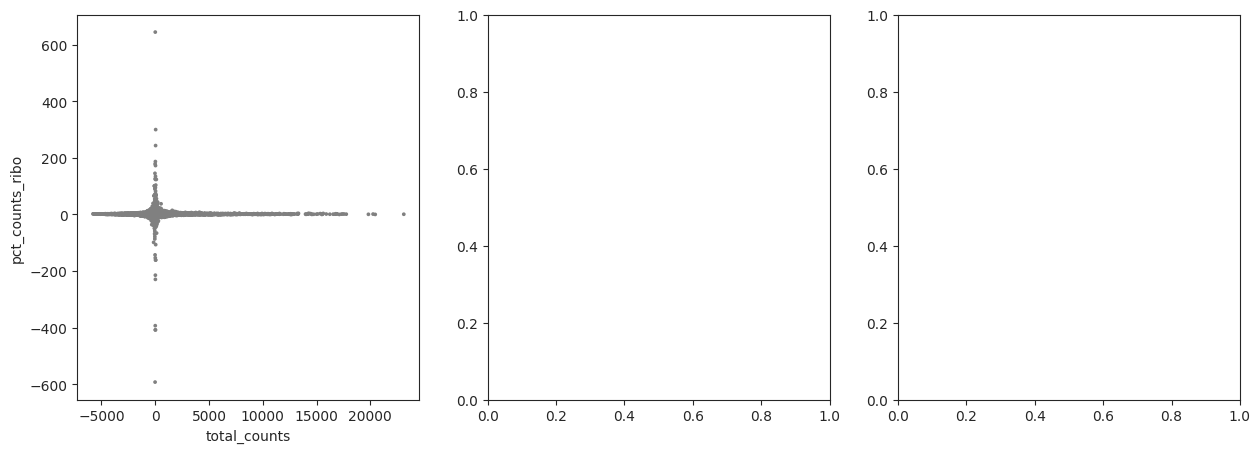

<class 'anndata._core.anndata.AnnData'>

<<< CLUSTERING HH06 >>>


Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': 'orig.ident', 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'key_control': 'NT', 'key_treatment': 'KD'}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


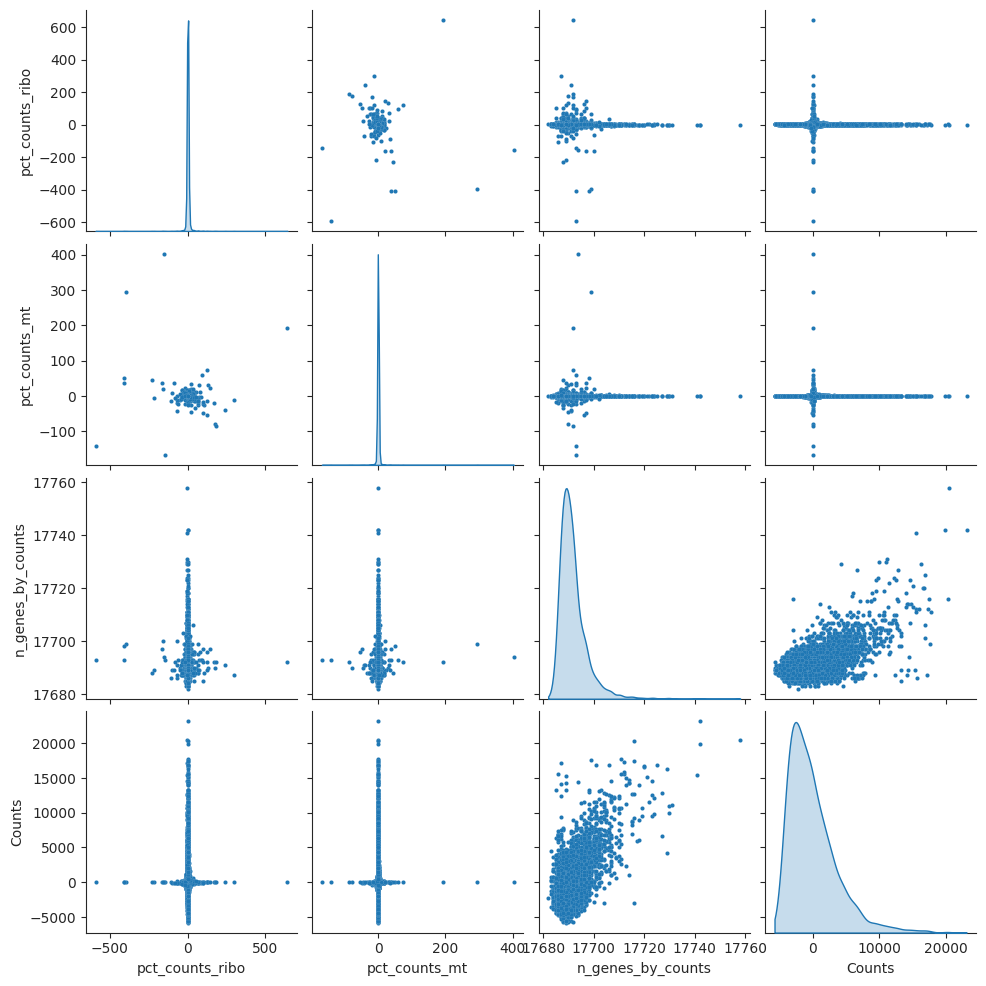

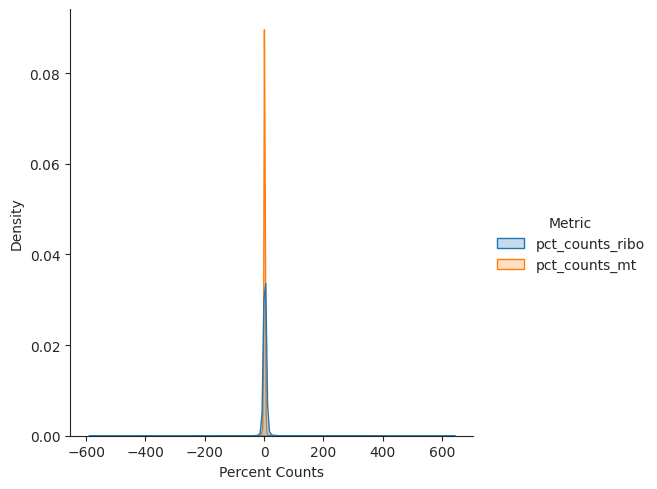

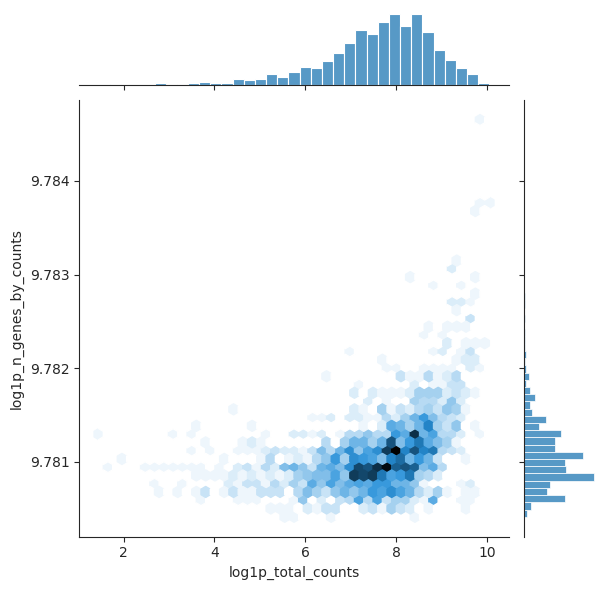

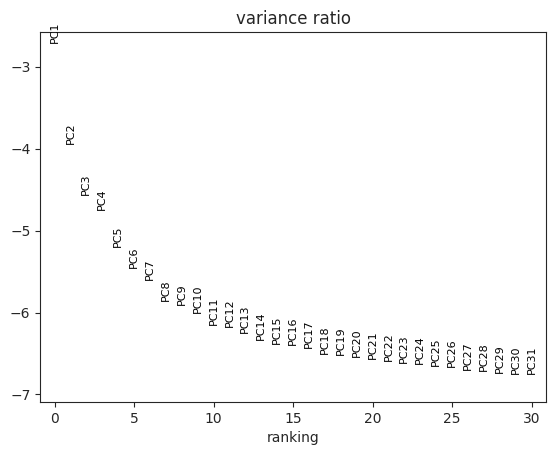

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'kws_hvg' as categorical
... storing 'target_sum' as categorical
... storing 'cell_filter_pmt' as categorical
... storing 'regress_out' as categorical
... storing 'kws_umap' as categorical
... storing 'cell_filter_ngene' as categorical
... storing 'cell_filter_ncounts' as categorical
... storing 'gene_filter_ncell' as categorical
... storing 'kws_scale' as categorical
... storing 'method_cluster' as categorical


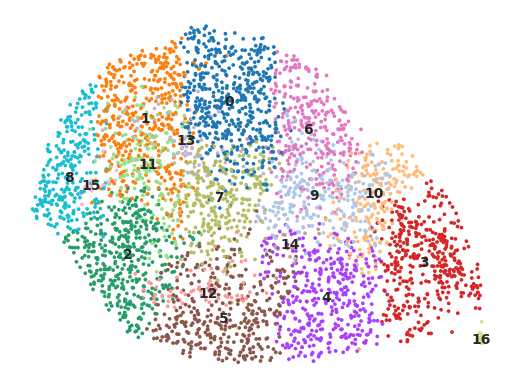


<<< CONCATENATING OBJECTS: HH03, HH04, HH05, HH06 >>>


2024-01-30 19:54:18,838 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
Computing initial centroids with sklearn.KMeans...



<<< INTEGRATING WITH HARMONY >>>


2024-01-30 19:54:52,176 - harmonypy - INFO - sklearn.KMeans initialization complete.
sklearn.KMeans initialization complete.
2024-01-30 19:54:52,319 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2024-01-30 19:55:03,184 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2024-01-30 19:55:16,516 - harmonypy - INFO - Iteration 3 of 10
Iteration 3 of 10
2024-01-30 19:55:29,553 - harmonypy - INFO - Iteration 4 of 10
Iteration 4 of 10
2024-01-30 19:55:42,448 - harmonypy - INFO - Iteration 5 of 10
Iteration 5 of 10
2024-01-30 19:55:54,025 - harmonypy - INFO - Iteration 6 of 10
Iteration 6 of 10
2024-01-30 19:56:04,319 - harmonypy - INFO - Iteration 7 of 10
Iteration 7 of 10
2024-01-30 19:56:17,059 - harmonypy - INFO - Iteration 8 of 10
Iteration 8 of 10
2024-01-30 19:56:30,301 - harmonypy - INFO - Iteration 9 of 10
Iteration 9 of 10
2024-01-30 19:56:39,300 - harmonypy - INFO - Iteration 10 of 10
Iteration 10 of 10
2024-01-30 19:56:44,400 - harmonypy - INFO - Stopped before con



 AnnData object with n_obs × n_vars = 17673 × 22181
    obs: 'num_features', 'feature_call_original', 'num_umis_original', 'feature_call', 'num_umis', 'target_gene_name', 'guide_split', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'assay_protein', 'col_gene_symbols', 'col_cell_type', 'col_sample_id', 'col_batch', 'col_subject', 'col_condition', 'col_num_umis', 'kws_hvg', 'target_sum', 'cell_filter_pmt', 'regress_out', 'kws_umap', 'cell_filter_ngene', 'cell_filter_ncounts', 'gene_filter_ncell', 'kws_scale', 'method_cluster', 'leiden', 'kws_pca', 'kws_neighbors', 'kws_cluster', 'resolution', 'orig.ident'
    var: 'gene_ids-HH03', 'feature_types-HH03', 'mt-HH03', 'ribo-HH03', 'hb-HH03', 'n_cells_by_counts-HH03', 'mean_counts

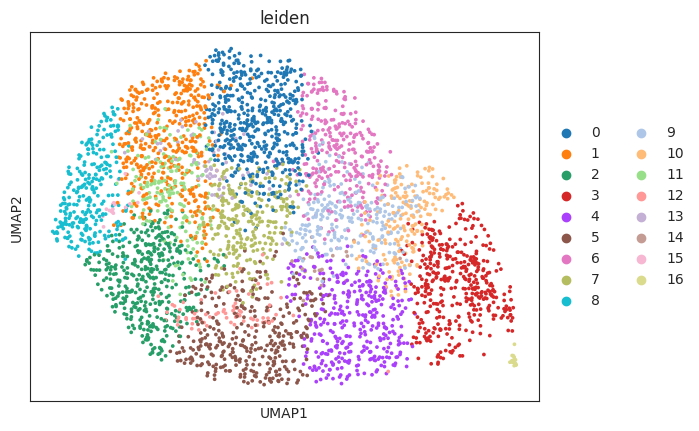

In [4]:
kws_multi = dict(kws_pp=kws_pp, kws_harmony=kws_harmony,
                 kws_cluster=kws_cluster)  # pre-integration processing
self = cr.Crispr(file_path, **kws_init, **kws_crispr,
                 kws_multi=kws_multi)  # create object

# Clustering & Annotations

Clustering was conducted in the individual objects in `cr.pp.create_object_multi()`, but we want to re-do QC and clustering in the overall sample.

## Clustering

We need to have `kws_pca=False` so that the Harmony-adjusted PCA created during integration (rather than a newly-calculated one) will be used.



Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'majority_voting', 'col_sample_id': 'orig.ident', 'col_batch': 'orig.ident', 'col_subject': None, 'col_condition': 'target_gene_name', 'col_num_umis': 'num_umis', 'col_target_genes': 'target_gene_name', 'col_perturbed': 'perturbation', 'col_guide_rna': 'feature_call', 'col_guide_split': 'guide_split', 'key_control': 'NT', 'key_treatment': 'KD', 'key_nonperturbed': 'NP'}




<<< EMBEDDING: UMAP >>>

UMAP Keywords:

 {'min_dist': 0.3}


<<< CLUSTERING WITH LEIDEN METHOD >>>


... storing 'kws_umap' as categorical
... storing 'kws_pca' as categorical
... storing 'kws_neighbors' as categorical
... storing 'kws_cluster' as categorical
... storing 'resolution' as categorical
... storing 'perturbation' as categorical




<<< CREATING UMAP PLOTS >>>


... storing 'gene_ids-HH03' as categorical
... storing 'gene_ids-HH04' as categorical
... storing 'gene_ids-HH05' as categorical
... storing 'gene_ids-HH06' as categorical


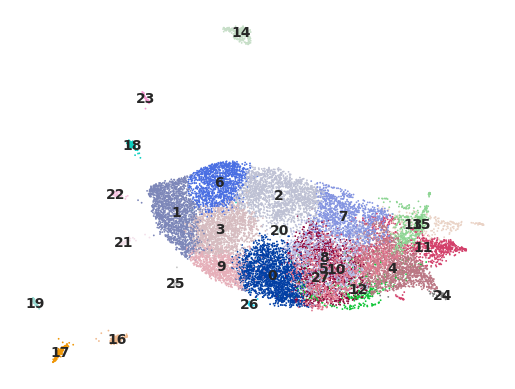

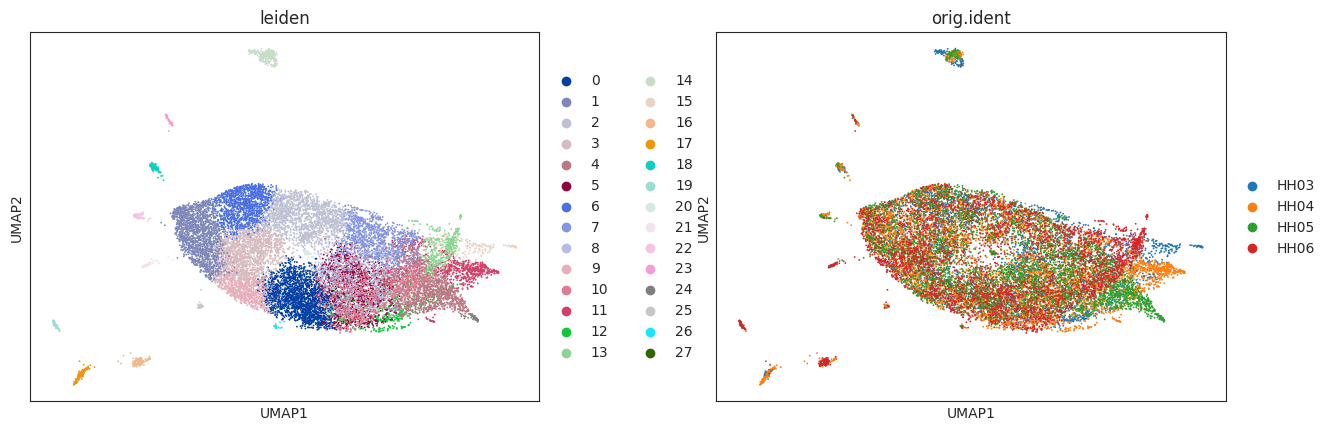

{'umap': None, 'umap_extra': None}

In [6]:
self.cluster(**kws_cluster, layer="log1p")

## CellTypist

Annotate cell types.

🔬 Input data has 17673 cells and 22181 genes
🔗 Matching reference genes in the model
🧬 5302 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


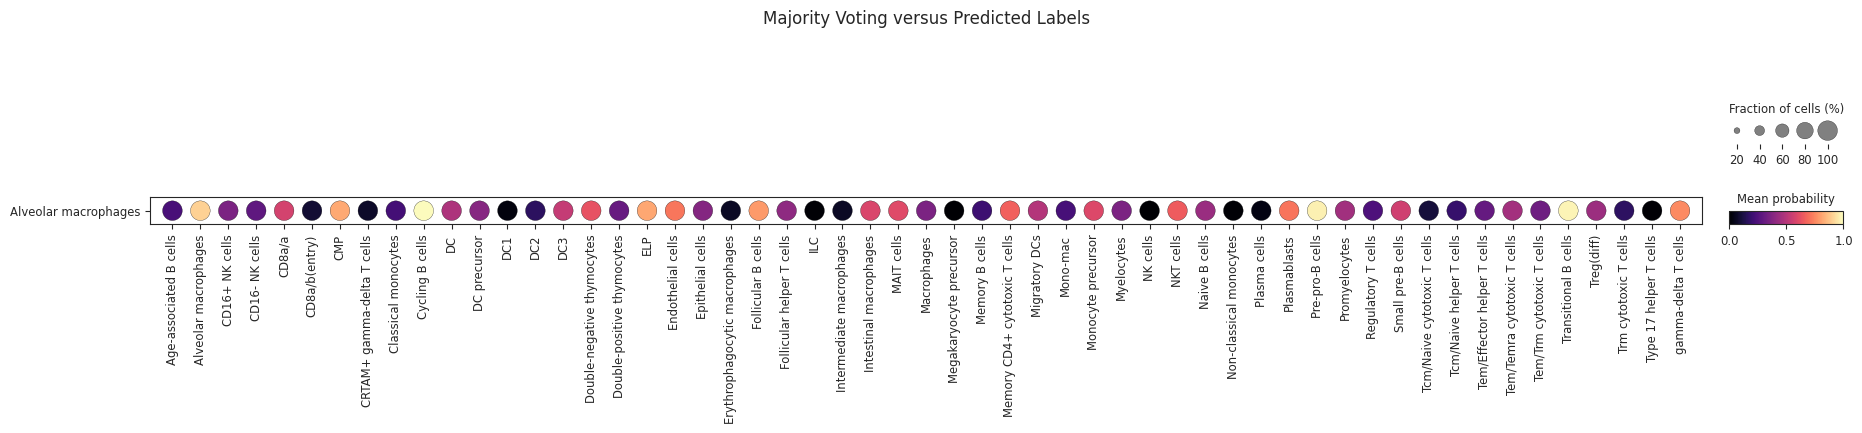

num_features  \
AAACCCAAGATTTGCC-1-HH03           2.0   
AAACCCAGTCTCAAGT-1-HH03           1.0   
AAACCCAGTGTTAGCT-1-HH03           4.0   
AAACCCATCTCTCTTC-1-HH03           2.0   
AAACGAAAGCCTTCTC-1-HH03           3.0   
...                               ...   
TTTGGTTTCGCTAGCG-1-HH06           4.0   
TTTGTTGCACAACGAG-1-HH06           2.0   
TTTGTTGCATTAGGAA-1-HH06           2.0   
TTTGTTGGTCGCATCG-1-HH06           4.0   
TTTGTTGGTTAGGCCC-1-HH06           2.0   

                                              feature_call_original  \
AAACCCAAGATTTGCC-1-HH03                             SNX17-1|SNX17-2   
AAACCCAGTCTCAAGT-1-HH03                                      SPI1-2   
AAACCCAGTGTTAGCT-1-HH03  SNX17-1|IL10RB-1|NEG_CTRL-3-1|NEG_CTRL-3-2   
AAACCCATCTCTCTTC-1-HH03                           POLR2E-1|POLR2E-2   
AAACGAAAGCCTTCTC-1-HH03                      LACC1-1|STK11-2|MAFB-2   
...                                                             ...   
TTTGGTTTCGCTAGCG-1-HH06              ZFP36-1|RPN2-1|ABCA7-2|ZFP36-2   
TTTGTTGCACAACGAG-1-HH06                             ZFP36-1|ZFP36-2   
TTTGTTGCATTAGGAA-1-HH06                             GPX4-1|CRYZL1-2   
TTTGTTGGTCGCATCG-1-HH06         SNX17-1|CYLD-1|SNX17-2|NEG_CTRL-3-2   
TTTGTTGGTTAGGCCC-1-HH06                               GPX4-1|GPX4-2   

                        num_umis_original            feature_call num_umis  \
AAACCCAAGATTTGCC-1-HH03            200|33             SNX17|SNX17    233.0   
AAACCCAGTCTCAAGT-1-HH03                11                    SPI1     11.0   
AAACCCAGTGTTAGCT-1-HH03       21|64|74|35      SNX17|IL10RB|NT|NT     64.0   
AAACCCATCTCTCTTC-1-HH03           549|128           POLR2E|POLR2E    677.0   
AAACGAAAGCCTTCTC-1-HH03      118|134|1531        LACC1|STK11|MAFB   1531.0   
...                                   ...                     ...      ...   
TTTGGTTTCGCTAGCG-1-HH06       9|221|14|19  ZFP36|RPN2|ABCA7|ZFP36    221.0   
TTTGTTGCACAACGAG-1-HH06             98|54             ZFP36|ZFP36    152.0   
TTTGTTGCATTAGGAA-1-HH06            240|19             GPX4|CRYZL1    240.0   
TTTGTTGGTCGCATCG-1-HH06       110|9|31|26     SNX17|CYLD|SNX17|NT    141.0   
TTTGTTGGTTAGGCCC-1-HH06           402|169               GPX4|GPX4    571.0   

                        target_gene_name guide_split  n_counts  log_counts  \
AAACCCAAGATTTGCC-1-HH03            SNX17           -   17573.0    9.774233   
AAACCCAGTCTCAAGT-1-HH03             SPI1           -   10416.0    9.251194   
AAACCCAGTGTTAGCT-1-HH03           IL10RB           -   12039.0    9.395989   
AAACCCATCTCTCTTC-1-HH03           POLR2E           -   10592.0    9.268138   
AAACGAAAGCCTTCTC-1-HH03             MAFB           -   10605.0    9.269270   
...                                  ...         ...       ...         ...   
TTTGGTTTCGCTAGCG-1-HH06             RPN2           -    3742.0    8.227376   
TTTGTTGCACAACGAG-1-HH06            ZFP36           -   11117.0    9.316231   
TTTGTTGCATTAGGAA-1-HH06             GPX4           -   11284.0    9.331230   
TTTGTTGGTCGCATCG-1-HH06            SNX17           -    9676.0    9.177507   
TTTGTTGGTTAGGCCC-1-HH06             GPX4           -    4085.0    8.315077   

                         n_genes  ...  kws_pca  kws_neighbors  kws_cluster  \
AAACCCAAGATTTGCC-1-HH03     4760  ...    False           None           {}   
AAACCCAGTCTCAAGT-1-HH03     3271  ...    False           None           {}   
AAACCCAGTGTTAGCT-1-HH03     3562  ...    False           None           {}   
AAACCCATCTCTCTTC-1-HH03     3175  ...    False           None           {}   
AAACGAAAGCCTTCTC-1-HH03     3307  ...    False           None           {}   
...                          ...  ...      ...            ...          ...   
TTTGGTTTCGCTAGCG-1-HH06     1352  ...    False           None           {}   
TTTGTTGCACAACGAG-1-HH06     3127  ...    False           None           {}   
TTTGTTGCATTAGGAA-1-HH06     3213  ...    False           None           {}   
TTTGTTGGTCGCATCG-1-HH06  

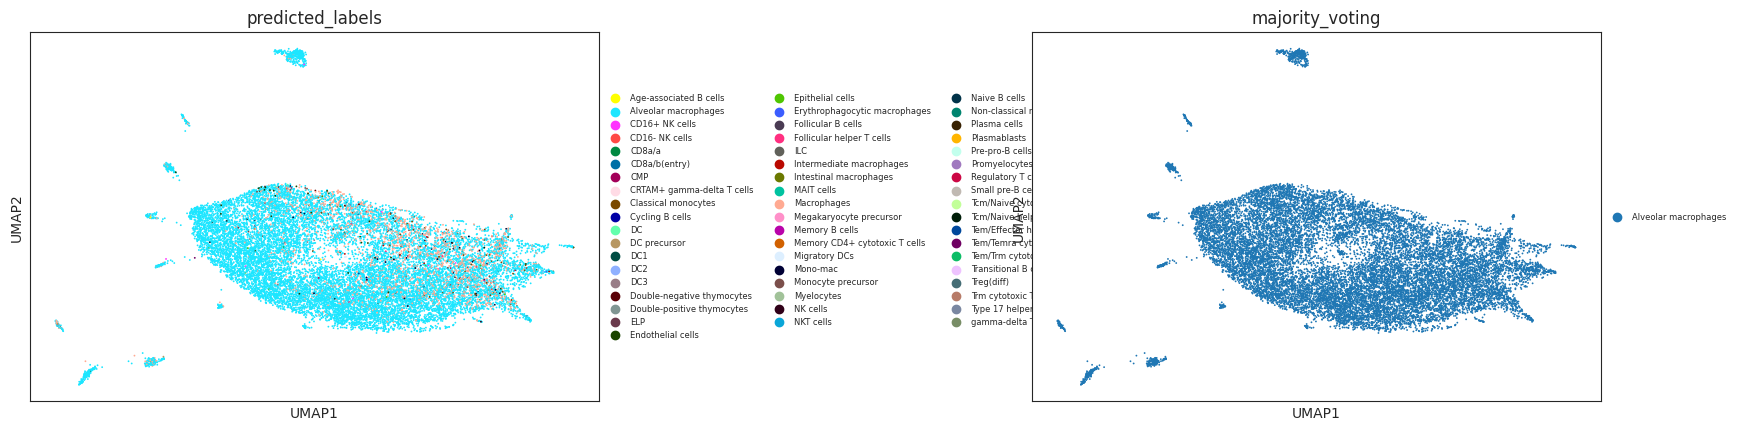

In [9]:
_ = self.annotate_clusters(model="Immune_All_Low.pkl")
self.rna.obs

In [10]:
self._columns["col_cell_type"] = "predicted_labels"

# Plots

In [ ]:
cct = "predicted_labels" if "predicted_labels" in self.rna.obs else None
clus = list(self.rna.obs[cct].sample(2))  # clusters to circle
figs = self.plot(genes=36,
                 kws_qc=True,
                 col_cell_type=cct,
                 layers="all",  # also plot "scaled" layer, for instance
                 kws_gex_violin=dict(scale="area", height=10),
                 kws_clustering=dict(col_cell_type=cct))

# Analyses

Perform perturbation-specific analyses.

## Augur

In [ ]:
cct = "predicted_labels" if "predicted_labels" in self.rna.obs else \
    self._columns["col_cell_type"]
_ = self.run_augur(
    col_cell_type=cct,
    # ^ will be label in self._columns by default, but can override here
    col_perturbed=self._columns["col_perturbed"],
    # ^ will be this by default if unspecified, but can override here
    key_treatment=self._keys["key_treatment"],
    # ^ will be this by default if unspecified, but can override here
    select_variance_features=True,  # filter by highly variable genes
    classifier="random_forest_classifier", n_folds=3, augur_mode="default",
    kws_umap=kws_umap, subsample_size=5, kws_augur_predict=dict(span=0.7))

## Mixscape

Classify perturbation "escapees," score perturbation responses, and find perturbation-based clusters.

In [ ]:
# col_split_by = self._columns["col_sample_id"]  # separate by sample
col_split_by = None  # calculate together
target_gene_idents = ["NOD2", "LACC1", "ATG16L1", "IL6ST"]  # plot these
_ = self.run_mixscape(col_split_by=col_split_by,
                      target_gene_idents=target_gene_idents)  # Mixscape

## Distance

Investigate distance metrics.

In [17]:
_ = self.compute_distance(distance_type="edistance", layer="counts", n_jobs=4,
                          key_condition=["NT", "NOD2", "LACC1", "PTGER4"],
                          # ^ contrast these conditions vs. control (NT)
                          # key_condition=False,  # to skip contrasts
                          alpha=0.05, correction="holm-sidak", n_perms=100)

Using layer counts for distance calculation.


Output()